# Importing Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Loding data

In [2]:
dataset=pd.read_csv("train.csv")
x_train=dataset.iloc[:,1:].values
y_train=dataset.iloc[:,0].values
x_test=pd.read_csv("test.csv")

# checking for null or missing values

In [3]:
dataset.info
dataset.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
pixel5      0
pixel6      0
pixel7      0
pixel8      0
pixel9      0
pixel10     0
pixel11     0
pixel12     0
pixel13     0
pixel14     0
pixel15     0
pixel16     0
pixel17     0
pixel18     0
pixel19     0
pixel20     0
pixel21     0
pixel22     0
pixel23     0
pixel24     0
pixel25     0
pixel26     0
pixel27     0
pixel28     0
           ..
pixel754    0
pixel755    0
pixel756    0
pixel757    0
pixel758    0
pixel759    0
pixel760    0
pixel761    0
pixel762    0
pixel763    0
pixel764    0
pixel765    0
pixel766    0
pixel767    0
pixel768    0
pixel769    0
pixel770    0
pixel771    0
pixel772    0
pixel773    0
pixel774    0
pixel775    0
pixel776    0
pixel777    0
pixel778    0
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

# reshaping image dimension as required for our task

In [4]:
y_train

array([1, 0, 1, ..., 7, 6, 9], dtype=int64)

In [5]:
x_train = np.array(x_train).reshape(-1,28,28,1)
x_test=np.array(x_test).reshape(-1,28,28,1)
x_train.shape

(42000, 28, 28, 1)

# Normalizating our pixel values

In [6]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train=x_train/255
x_test=x_test/255

# converting y_train values into categorical and avoiding dummy variable trap

In [7]:
y_train=np.array(pd.get_dummies(y_train))

In [8]:
y_train

array([[0, 1, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1]], dtype=uint8)

# importing Tenserflow backend

In [10]:
import keras
from keras.models import Sequential
import warnings
warnings.filterwarnings('ignore')

In [11]:
model = Sequential()

In [12]:
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization

# Building Neural Network

In [13]:
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=[28,28,1]))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
#randomly turn neurons on and off to improve convergence
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
#output a softmax to squash the matrix into output probabilities
model.add(Dense(10, activation='softmax'))

# Compiling the Nerual Network Model

In [14]:
model.compile(loss='categorical_crossentropy',optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])

# Traning model

In [15]:
ans = model.fit(x_train, y_train,batch_size=200,epochs=10,verbose=1,validation_split=0.10)

Train on 37800 samples, validate on 4200 samples
Epoch 1/10
37800/37800 [==============================] - 355s 9ms/step - loss: 0.2109 - acc: 0.9374 - val_loss: 0.0645 - val_acc: 0.9790
Epoch 2/10
37800/37800 [==============================] - 196s 5ms/step - loss: 0.0755 - acc: 0.9780 - val_loss: 0.0439 - val_acc: 0.9848
Epoch 3/10
37800/37800 [==============================] - 173s 5ms/step - loss: 0.0520 - acc: 0.9843 - val_loss: 0.0446 - val_acc: 0.9862
Epoch 4/10
37800/37800 [==============================] - 173s 5ms/step - loss: 0.0401 - acc: 0.9873 - val_loss: 0.0433 - val_acc: 0.9857
Epoch 5/10
37800/37800 [==============================] - 179s 5ms/step - loss: 0.0325 - acc: 0.9903 - val_loss: 0.0350 - val_acc: 0.9883
Epoch 6/10
37800/37800 [==============================] - 173s 5ms/step - loss: 0.0269 - acc: 0.9916 - val_loss: 0.0343 - val_acc: 0.9883
Epoch 7/10
37800/37800 [==============================] - 177s 5ms/step - loss: 0.0222 - acc: 0.9935 - val_loss: 0.0283 - v

# Predicting Test data

In [24]:
y_pred = model.predict(x_test)

In [25]:
y_pred

array([[1.5940130e-06, 4.5263974e-08, 9.9999690e-01, ..., 7.8644320e-07,
        1.4097836e-07, 4.2622741e-08],
       [9.9999619e-01, 6.9092332e-09, 3.0121791e-06, ..., 8.5030621e-08,
        1.9285382e-09, 1.7040703e-08],
       [1.7685717e-10, 6.0712524e-10, 4.7222265e-08, ..., 5.8188139e-09,
        2.3356985e-07, 9.9999452e-01],
       ...,
       [3.5015383e-11, 1.0146541e-10, 1.5564959e-09, ..., 9.0766799e-09,
        9.1941192e-09, 1.0238433e-07],
       [6.7681174e-07, 2.6205775e-08, 4.4332036e-09, ..., 5.9253762e-06,
        6.6518544e-07, 9.9992645e-01],
       [2.8469794e-08, 1.1367220e-08, 9.9999797e-01, ..., 1.3717651e-07,
        1.6411751e-06, 5.4006701e-08]], dtype=float32)

# Saving data to csv file

In [26]:
pd.DataFrame({'ImageId': np.arange(1,len(x_test)+1), 'label': np.argmax(model.predict(x_test), axis=1)}).to_csv('Final_submission.csv', index=False)

# Accuracy per epoch Graph

Text(0.5,0,'Epoch')

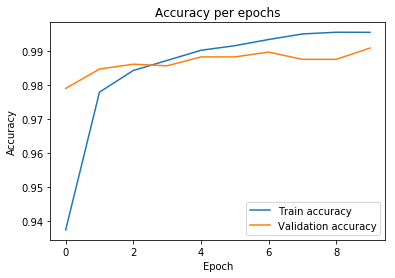

In [27]:
plt.figure()
plt.plot(ans.history['acc'])
plt.plot(ans.history['val_acc'])
plt.title("Accuracy per epochs")
plt.legend(['Train accuracy', 'Validation accuracy'])
plt.ylabel("Accuracy")
plt.xlabel("Epoch")

# Loss per Epoch Graph

Text(0,0.5,'Loss')

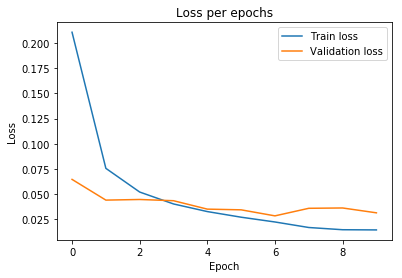

In [22]:
plt.figure()
plt.plot(ans.history['loss'])
plt.plot(ans.history['val_loss'])
plt.title("Loss per epochs")
plt.legend(['Train loss', 'Validation loss'])
plt.xlabel("Epoch")
plt.ylabel("Loss")